In [1]:
import sys
import os
root = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(sys.argv[0])))))
path_data = root + "/Documents/GitHub/Kitaev_LR_QP/data/localization/data_paper/"
path_figures = root + "/Documents/GitHub/Kitaev_LR_QP/figures/localization/figures_paper/"
path_cluster = root + "/Documents/GitHub/Kitaev_LR_QP/cluster/"
            
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
from matplotlib import rc
from matplotlib.ticker import FormatStrFormatter
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.ticker as ticker

def Fibonacci(iterations):
    
    """Return Fibonacci sequence number depending on the iterations"""
    
    Fn1 = 0
    Fn = 1
    for n in range(iterations):
        Fn2 = Fn1
        Fn1 = Fn
        Fn = Fn1 + Fn2  
        
    return Fn1, Fn

fs = 45
plt.rc('xtick',labelsize=fs)
plt.rc('ytick',labelsize=fs)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# FIGURE 1 - SHORT RANGE KITAEV CHAIN

In [2]:
path_data1 = path_data + 'fig_12/'

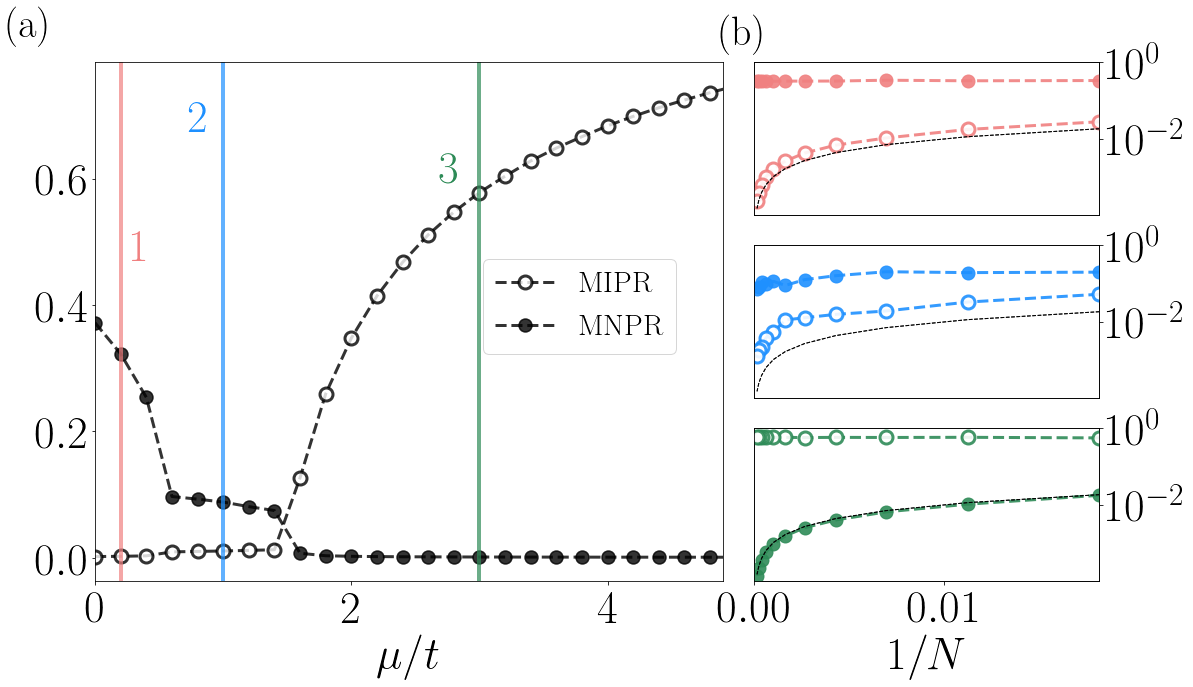

In [14]:
color_list = ['lightcoral','dodgerblue','seagreen']
marker_list = ['^-.', 'X--', 'd:']

##############################################
fig = plt.figure(figsize=(18, 23))

gs_plot = gridspec.GridSpec(7, 11, figure=fig)
gs_plot.update(wspace=0.5)
gs_plot.update(hspace=0.2)

gs_plot2 = gridspec.GridSpec(7, 22, figure=fig)
gs_plot2.update(wspace=0.2)
gs_plot2.update(hspace=0.2)

#############################################
it = 14
Fn1, Fn = Fibonacci(it)

it = 14
mu_list = np.arange(0, 5.2, 0.2)
delta = 0.5

name = 'Kitaev_SR_delta_%.2f' %delta

IPR = np.load(path_data1 + 'IPR_%s_it_%.0f.npy'%(name,it))
NPR = np.load(path_data1 + 'NPR_%s_it_%.0f.npy'%(name, it))
evals_total = np.load(path_data1 + 'evals_%s_it_%.0f.npy'%(name,it))

ax = fig.add_subplot(gs_plot[0:3, 0:7])
IPR_mean =  NPR_mean = IPR_sigma = []

for m, mu in enumerate(mu_list):

    IPR_mean = np.append(IPR_mean, np.mean(IPR[:,m]))
    NPR_mean = np.append(NPR_mean, np.mean(NPR[:,m]))
    #IPR_sigma = np.append(IPR_sigma, np.sqrt(np.var(IPR[:,m])))

ax.plot(mu_list, IPR_mean, 'o--', color='k', fillstyle='full', markerfacecolor='white', markeredgewidth=3, alpha=0.8, markersize=13, linewidth=3, label='MIPR')
ax.plot(mu_list, NPR_mean, 'o--', color='k',fillstyle='full', markerfacecolor='k', markeredgewidth=1.5, alpha=0.8, markersize=13, linewidth=3, label='MNPR')   
#ax.errorbar(mu_list, IPR_mean, yerr=IPR_sigma, color='k', alpha=0.7)
ax.legend(fontsize=fs-15, loc=1, bbox_to_anchor=(0.95,0.65))
#ax.set_yscale('log')
ax.set_xlabel(r'$\mu/t$', fontsize=fs)
ax.set_xlim(0,4.9)
#ax.set_ylim(0.001,1)

mu_list = [0.2,1,3]
for i, mu in enumerate(mu_list):
    color = color_list[i]
    ax.axvline(mu, linestyle='-', color=color, linewidth=4, alpha=0.7)

ax.text(0.09, 0.6, r'$1$',
        verticalalignment='bottom', horizontalalignment='right',
        color = color_list[0], transform=ax.transAxes, fontsize=fs)
ax.text(0.18, 0.85, r'$2$',
        verticalalignment='bottom', horizontalalignment='right',
        color = color_list[1], transform=ax.transAxes, fontsize=fs)
ax.text(0.58, 0.75, r'$3$',
        verticalalignment='bottom', horizontalalignment='right',
        color = color_list[2], transform=ax.transAxes, fontsize=fs)
    
ax.text(-0.14, 1.05, '(a)', transform=ax.transAxes, size=40,family='STIXGeneral')

############################ scaling

iterations = [10,11,12,13,14,15,16,17,18,19]
mu_list = [0.2, 1, 3]
delta = 0.5
it = 10
name = 'Kitaev_SR_delta_%.2f' %delta

for i, mu in enumerate(mu_list):

    color = color_list[i]
    
    IPR_list = np.load(path_data1 + 'scaling_mu_%.2f_IPR_%s.npy'%(mu, name))[1:]
    NPR_list = np.load(path_data1 + 'scaling_mu_%.2f_NPR_%s.npy'%(mu, name))[1:]
    Fn_list = np.load(path_data1 + 'scaling_mu_%.2f_Fn_%s.npy'%(mu, name))[1:]
    
    ax1 = fig.add_subplot(gs_plot[i, 7:11])
    ax1.set_yticks([])
    ax = ax1.twinx()
    ax.plot(1/Fn_list, IPR_list, 'o--', color=color, markerfacecolor='white', markeredgewidth=3, markersize=13, linewidth=3, label='MIPR', alpha=0.9)
    ax.plot(1/Fn_list, NPR_list, 'o--', color=color, markerfacecolor=color, markersize=13, linewidth=3, label='MNPR', alpha=0.9)
    ax.plot(1/Fn_list, 1/Fn_list, '--', color='k', linewidth=1, alpha=0.9)
    ax.plot(1/Fn_list, 1/Fn_list, '--', color='k', linewidth=1, alpha=0.9)
    
    if i < 2:
        ax1.set_xticks([])
    else:
        ax1.set_xlabel(r'$1/N$', fontsize=fs)
        ax1.set_xticks([0, 0.01, 0.02])
    ax.set_xlim(0,1/Fn_list[0])
    ax.set_yscale('log')
    ax.set_yticks([0.01, 1])
    ax.set_ylim(0.0001, 1)

    if i == 0:
        ax.text(-0.1, 1.12, '(b)', transform=ax.transAxes, size=40,family='STIXGeneral')

########################################################

plt.savefig(path_figures + 'global_measures_1.pdf',bbox_inches='tight')

# FIGURE 2 - SHORT RANGE KITAEV CHAIN

In [3]:
path_data1 = path_data + 'fig_12/'

/home/jfraxanet/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:851: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/home/jfraxanet/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


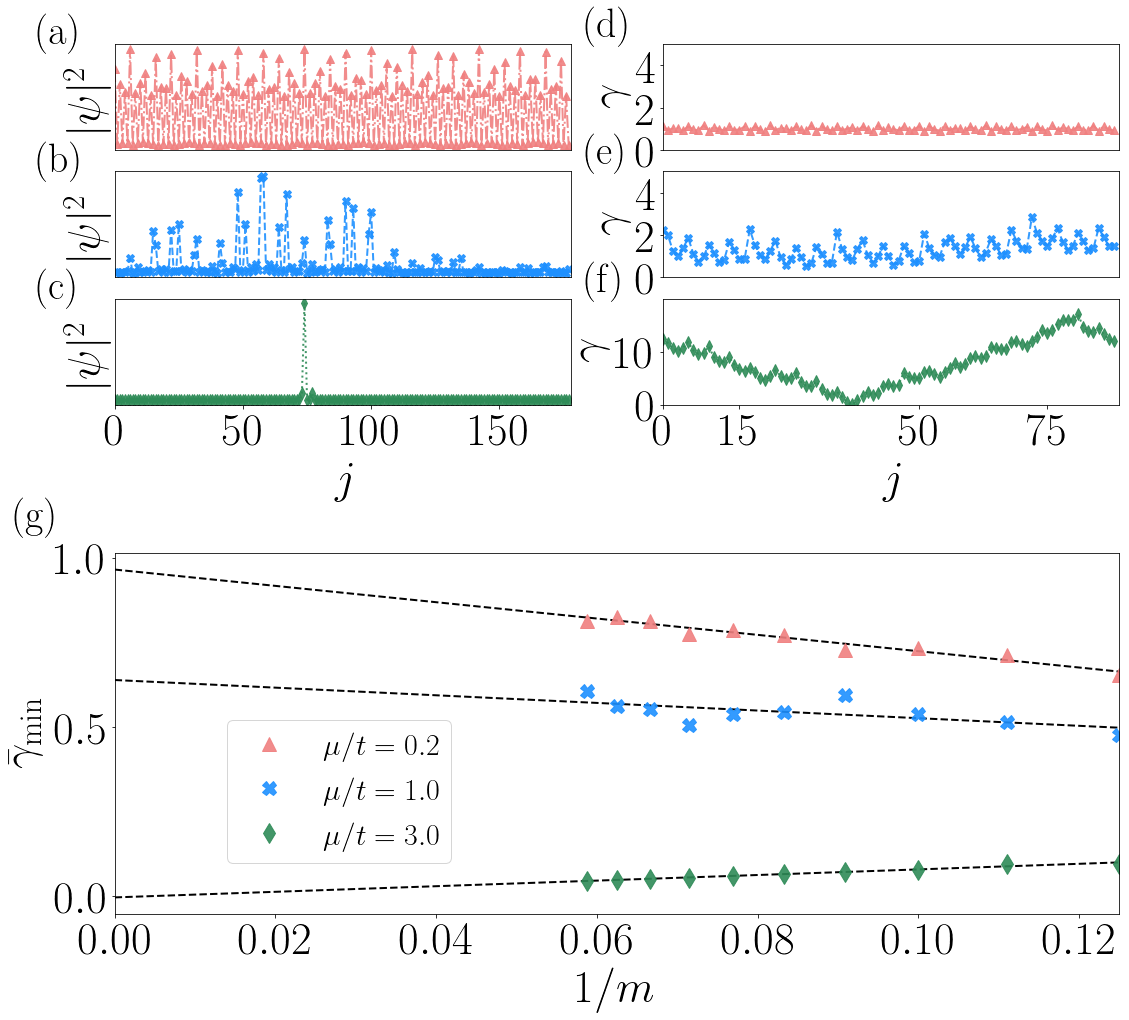

In [3]:
color_list = ['lightcoral','dodgerblue','seagreen']
marker_list = ['^-.', 'X--', 'd:']

##############################################
fig = plt.figure(figsize=(18, 16))

gs_plot = gridspec.GridSpec(7, 11, figure=fig)
gs_plot.update(wspace=0.5)
gs_plot.update(hspace=0.05)

gs_plot2 = gridspec.GridSpec(7, 22, figure=fig)
gs_plot2.update(wspace=0.2)
gs_plot2.update(hspace=0.2)

#######################################################
color_list = ['lightcoral','dodgerblue','seagreen']
marker_listl = ['^-.', 'X--', 'd:']
marker_list = ['^', 'X', 'd']

gs_plot = gridspec.GridSpec(7,6, figure=fig)
gs_plot.update(wspace=1)
gs_plot.update(hspace=0.2)

################################################

ax = fig.add_subplot(gs_plot[4:7, 0:6])
iterations = [8,9,10,11,12,13,14,15,16,17]

Fn_list = []
for it in iterations:
    Fn_list = np.append(Fn_list, Fibonacci(it)[1])

delta = 0.5
name = 'Kitaev_SR_delta_%.2f' %delta
mu_list = [0.2,1,3]

ax.set_xlabel(r'$1/m$', fontsize = fs) 
ax.set_ylabel(r'$\bar{\gamma}_{\mathrm{min}}$', fontsize = fs) 

for i, mu in enumerate(mu_list):

    color = color_list[i]
    marker=marker_list[i]
    g_min = np.load(path_data1 + 'g_min_%s_mu_%.2f.npy' %(name,mu))
    coef = np.polyfit(1/np.array(iterations), np.real(g_min), deg=1)
    x = np.linspace(0,1/8)
    ax.plot(x, coef[0]*x + coef[1], '--', color='black', linewidth=2, alpha=1)
    ax.plot(1/np.array(iterations), np.real(g_min), marker, color=color, markersize=14, linewidth=3, alpha=0.9, label = r'$\mu/t = %.1f$' %mu) 
    
ax.set_xlim(0,1/iterations[0])
ax.legend(fontsize=fs-15, loc=1, bbox_to_anchor=(0.35,0.58))

ax.text(-0.1, 1.07, '(g)', transform=ax.transAxes, size=40,family='STIXGeneral')

###############################################

it = 10
Fn1, Fn = Fibonacci(it)
mu_list = [0.2, 1, 3]
delta = 0.5
name = 'Kitaev_SR_delta_%.2f' %delta
heights = [0.8,0.6,0.4]
label = ['(a)', '(b)', '(c)']

for j,mu in enumerate(mu_list):
    
    evec = np.load(path_data1 + 'evecs_%s_mu_%.2f_it_%.0f.npy'%(name, mu, it))[0]
    
    ax = fig.add_subplot(gs_plot[j, 0:3])
    color=color_list[j]
    marker=marker_listl[j]
    ax.plot(range(2*Fn), abs(evec*np.conjugate(evec)),  marker,color=color, markersize=8, linewidth=2, alpha=0.9, label = r'$\mu = %.2f$' %mu)  
    
    ax.set_xlim(0,2*Fn)
    ax.set_yticks([])    
      
    if j < 2:
        ax.set_xticks([])
    else:
        ax.set_xticks([0,50,100,150])
    if j == 2:
        ax.set_xlabel(r'$j$', fontsize = fs)
    ax.set_ylabel(r'$\vert \psi \vert^2$',fontsize = fs)

    ax.text(-0.17, 1, label[j], transform=ax.transAxes, size=40,family='STIXGeneral')
        
########################################################

it = 10
Fn1, Fn = Fibonacci(it)
mu_list = [0.2, 1, 3]
delta = 0.5
name = 'Kitaev_SR_delta_%.2f' %delta
heights = [0.8,0.6,0.4]
label = ['(d)', '(e)', '(f)']
for j,mu in enumerate(mu_list):
    
    gammas = np.load(path_data1 + 'spectrum_gs_%s_mu_%.2f_it_%.0f.npy' %(name, mu, it))
    hist, bin_edges = np.histogram(gammas, 50)
    
    ax = fig.add_subplot(gs_plot[j, 3:6])
    color=color_list[j]
    marker=marker_listl[j] 
    #ax.plot(bin_edges[1:], hist, marker, color=color, markersize=8, linewidth=2, alpha=0.9, label = r'$\mu = %.2f$' %mu) 
    ax.plot(gammas,  marker, color=color, markersize=8, linewidth=2, alpha=0.9, label = r'$\mu = %.2f$' %mu)  
      
    ax.set_ylim(0,5)
    ax.set_yticks([0,2,4])
    if j == 2:
        ax.set_ylim(0,20)
        ax.set_yticks([0,10])
    if j < 2:
        ax.set_xticks([])
    else:
        ax.set_xticks([0,15,50,75])
    ax.set_xlim(0,Fn)
        
    if j == 2:
        ax.set_xlabel('$j$', fontsize = fs)
    ax.set_ylabel(r'$\gamma$', fontsize = fs)
    
    ax.text(-0.17, 1.07, label[j], transform=ax.transAxes, size=40,family='STIXGeneral')
        
####################################################

plt.savefig(path_figures + 'global_measures_2.pdf',bbox_inches='tight')

# FIGURE 3 - SHORT RANGE KITAEV CHAIN COLOR MAP

In [13]:
path_data1 = path_data + 'fig_12/'

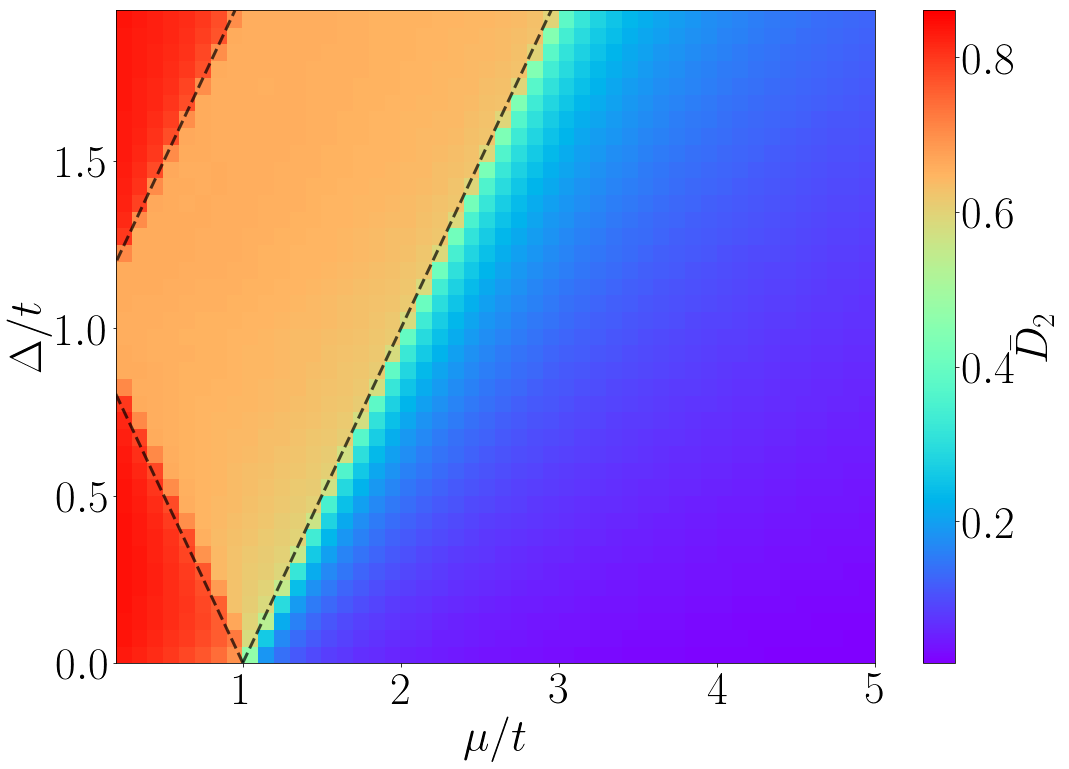

In [17]:
color_list = ['lightcoral','dodgerblue','seagreen']
marker_list = ['^-.', 'X--', 'd:']

##############################################
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=False, figsize=(17,12))

it = 14
mu_list = np.arange(0, 5.2, 0.1)
delta_list = np.arange(0, 2, 0.05)
name = 'Kitaev_SR_map'
Fn1, Fn = Fibonacci(it)

ax.set_rasterization_zorder(5)

IPR_map = np.load(path_data1 + 'IPR_%s_it_%.0f.npy'%(name, it))

ax.set_xlabel(r'$\mu/t$', fontsize=fs)
ax.set_ylabel(r'$\Delta/t$', fontsize=fs)
ax.set_xlim(0.2,5)
ax.set_xticks([1,2,3,4,5])
ax.set_yticks([0,0.5,1,1.5])
im = ax.pcolormesh(mu_list, delta_list, IPR_map, cmap='rainbow', rasterized = True)
cbar = plt.colorbar(im, ax=ax)
cbar.ax.set_ylabel(r'$\bar{D}_2$', fontsize=fs)
ax.plot(abs(delta_list+1), delta_list, 'k--', linewidth=3, alpha=0.7)
ax.plot(abs(delta_list-1), delta_list, 'k--', linewidth=3, alpha=0.7)

#######################################################
plt.savefig(path_figures + 'global_measures_D2.pdf',bbox_inches='tight')

# FIGURE 4 - LONG RANGE MODEL WITH AHH 

In [17]:
path_data2 = path_data + 'fig_34/'

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=False, figsize=(20,12))

marker_list = ['o-', 's--', 'd:']
cmap = 'rainbow'

alpha_list = [0.5, 1.5]
indexs = [15,10]

it = 16
Fn1, Fn = Fibonacci(it)

#######################################
mu_list = np.linspace(0, 10, 50)
labels = ['(a)', '(b)']

for j,alpha in enumerate(alpha_list):
    
    ax = axes[0][j]
    ax.set_rasterization_zorder(5)

    name = 'AA_nnn_%.2f' %alpha

    evals_total = np.load(path_data2 + 'evals_ME_%s_it_%.0f.npy'%(name,it))
    IPR_map = np.load(path_data2 + 'IPR_ME_%s_it_%.0f.npy'%(name,it))
    tau_map = abs(np.log(IPR_map[::-1]))/np.log(Fn)

    x = mu_list
    for i in range(len(evals_total.T)):   

        y = np.real(evals_total.T[i])
        tau = tau_map[i]

        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)

        norm = plt.Normalize(0,1)
        lc = LineCollection(segments, cmap='rainbow', norm=norm)
        lc.set_array(tau)
        lc.set_linewidth(2)
        line = ax.add_collection(lc)
        
    ax.set_xlim(0,10)
    ax.set_ylim(-10,1)
    ax.set_xticks([])
    if j == 0:
        ax.set_ylabel('$E/t$', fontsize=40)
        ax.set_yticks([-10,-5, 0])
    else:
        ax.set_yticks([])
    
    exps = [2,3,4]
    line1 = line2 = line3 = []
    for i,mu in enumerate(mu_list):
        line1 = np.append(line1, evals_total[i][int((Fn1/Fn)**exps[0]*Fn)])
        line2 = np.append(line2, evals_total[i][int((Fn1/Fn)**exps[1]*Fn)])
        line3 = np.append(line3, evals_total[i][int((Fn1/Fn)**exps[2]*Fn)])

    ax.plot(mu_list,  line1, '--', color='k', linewidth=3)
    ax.plot(mu_list,  line2, '--', color='k', linewidth=3)
    ax.plot(mu_list,  line3, '--', color='k', linewidth=3)
    
    ax.text(0.9, 0.35, r'$3$',
            verticalalignment='bottom', horizontalalignment='right',
            bbox={'facecolor': 'white', 'alpha': 0.7, 'pad':5},
            color = 'k', transform=ax.transAxes, fontsize=fs)
    ax.text(0.8, 0.25, r'$2$',
            verticalalignment='bottom', horizontalalignment='right',
            bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 5},
            color = 'k', transform=ax.transAxes, fontsize=fs)
    ax.text(0.7, 0.1, r'$1$',
            verticalalignment='bottom', horizontalalignment='right',
            bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 5},
            color = 'k', transform=ax.transAxes, fontsize=fs)
    
    #ax.axvline(mu_list[indexs[j]], linestyle = '--', color='r', linewidth=2, alpha = 0.7)
    
    if j == 0:
        ax.text(-0.25, 0.97, labels[j], transform=ax.transAxes, size=40, family='STIXGeneral')    
    else:
        ax.text(-0.15, 0.97, labels[j], transform=ax.transAxes, size=40, family='STIXGeneral')    
    
######################################################
mu_list = np.linspace(0, 10, 50)
alpha_list = [0.5,1.5]
exps = [2,3,4]
labels = ['(c)', '(d)']
color_list = ['lightcoral','dodgerblue','seagreen']
markers = ['o-', 's--', 'd:']
labels_plot = [r'$n/L \leq \beta^2$', r'$\beta^2 \leq  n/L \leq \beta^3$', r'$\beta^3 \leq n/L \leq \beta^4$']
for i, alpha in enumerate(alpha_list):

    ax = axes[1][i]
    name = 'AA_nnn_%.2f' %alpha
    IPR_map = np.load(path_data2 + 'IPR_ME_%s_it_%.0f.npy'%(name,it))
    D2_map = abs(np.log(IPR_map[::-1]))/np.log(Fn)

    for j,exp in enumerate(exps):
        color = color_list[j]
        D2_mean = D2_sigma = []
        for D2 in D2_map.T:   
            band_max = (Fn1/Fn)**(exp-1)
            band_min = (Fn1/Fn)**exp
            nL = np.arange(Fn)/Fn
            D2_band = D2[(nL<band_max)&(nL>band_min)]
            D2_mean = np.append(D2_mean, np.mean(D2_band))
            D2_sigma = np.append(D2_sigma, np.sqrt(np.var(D2_band)))

        ax.plot(mu_list[::2], D2_mean[::2], markers[j], color=color, linewidth=3, markersize=10, alpha=0.7, label=labels_plot[j])
        #ax.fill_between(mu_list[::2], D2_mean[::2] - D2_sigma[::2], D2_mean[::2] + D2_sigma[::2], color=color, alpha=0.7)

        if i == 0:
            ax.set_yticks([0,0.25,0.5,0.75])
            ax.set_ylabel(r'$\bar{D}_2$', fontsize=fs)
        else:
            ax.set_yticks([])
        
        ax.set_xticks([0,2,4,6,8,10])
        ax.set_ylim(0,1)
        ax.set_xlim(0,10)
        ax.set_xlabel(r'$\mu/t$', fontsize=fs)
        ax.legend(fontsize=fs-20)
        
    if i == 0:
        ax.text(-0.25, 0.97, labels[i], transform=ax.transAxes, size=40, family='STIXGeneral')    
    else:
        ax.text(-0.15, 0.97, labels[i], transform=ax.transAxes, size=40, family='STIXGeneral')    
    

######################################################
plt.tight_layout()
cbar = plt.colorbar(lc, ax=axes.ravel().tolist())
cbar.ax.set_ylabel(r'$D_2$', fontsize=fs)        
##########################################
fig.savefig(path_figures + 'local_measures.pdf',bbox_inches='tight')

# FIGURE 5 - LONG RANGE MODEL WITH AHH ENERGIES

In [5]:
path_data2 = path_data + 'fig_34/'

/home/jfraxanet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log


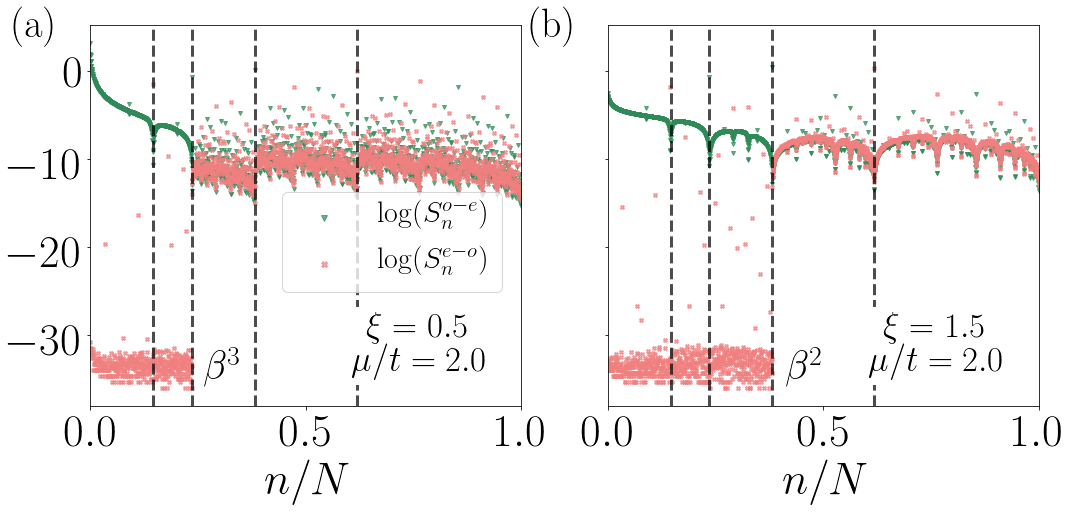

In [6]:
mu_list = np.linspace(0, 10, 100)[1:]

it = 18
Fn1, Fn = Fibonacci(it)

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(17,7))

cmap = 'rainbow'
color_list = ['lightcoral','seagreen']

alpha_list = [0.5, 1.5]
mu = 2

#########################################
mu_list = np.linspace(0, 5, 50)

labels = ['(a)', '(b)']

for i,alpha in enumerate(alpha_list):

    ax =  axes[i]
    ax.set_rasterization_zorder(5)
    
    name = 'AA_nnn_%.2f' %alpha
    evals_list = np.load(path_data2 + 'evals_ME_%s_it_%.0f_mu_%.2f.npy'%(name,it,mu))

    odd_diff = even_diff = []

    for j in range(1,int(len(evals_list)/2)):

        odd_diff = np.append(odd_diff, evals_list[2*j]-evals_list[2*j-1])
        even_diff = np.append(even_diff, evals_list[2*j+1]-evals_list[2*j])

    ax.plot(np.arange(len(odd_diff))[::-1]/len(odd_diff), np.log(odd_diff), 'v', color=color_list[1], markersize= 4, alpha=0.7, label=r'log($S_n^{o-e}$)')
    ax.plot(np.arange(len(even_diff))[::-1]/len(even_diff), np.log(even_diff), 'X', color=color_list[0], markersize = 4, alpha=0.7, label=r'log($S_n^{e-o}$)')
    ax.axvline(Fn1/Fn, color='k', linestyle='--', linewidth=3, alpha=0.7)
    ax.axvline((Fn1/Fn)**2, color='k', linestyle='--', linewidth=3, alpha=0.7)
    ax.axvline((Fn1/Fn)**3, color='k', linestyle='--', linewidth=3, alpha=0.7)
    ax.axvline((Fn1/Fn)**4, color='k', linestyle='--', linewidth=3, alpha=0.7)
    #ax.axvline(1-(Fn1/Fn)**5, color='k', linestyle='--', linewidth=3, alpha=0.7)
    ax.set_yticks([0,-10,-20,-30])
    
    if i == 0:
        ax.text(0.35, 0.05, r'$\beta^3$',
        verticalalignment='bottom', horizontalalignment='right',
        color = 'k', transform=ax.transAxes, fontsize=fs-5)
    else:
        ax.text(0.5, 0.05, r'$\beta^2$',
        verticalalignment='bottom', horizontalalignment='right',
        color = 'k', transform=ax.transAxes, fontsize=fs-5)
        
    if i == 0:
        ax.legend(fontsize=fs-15, markerscale=1.5, loc=1, bbox_to_anchor=(0.99,0.6))
    ax.set_xlabel(r'$n/N$', fontsize=fs) 
    ax.set_xlim(0,1)
    
    ax.text(0.92, 0.07, r'$\xi = %.1f \\ \mu/t = %.1f$' %(alpha, mu),
        verticalalignment='bottom', horizontalalignment='right',
        bbox={'facecolor': 'white', 'edgecolor': 'white', 'alpha': 1, 'pad': 5},
        color = 'k', transform=ax.transAxes, fontsize=fs-10)
    
    ax.text(-0.18, 0.97, labels[i], transform=ax.transAxes, size=40, family='STIXGeneral')    
    
######################################################
fig.savefig(path_figures + 'els_delta_0.pdf',bbox_inches='tight')

# FIGURE 6 - COLOR MAPS FOR LONG RANGE KITAEV CHAIN WITH AAH

In [3]:
path_data3 = path_data + 'fig_5/'

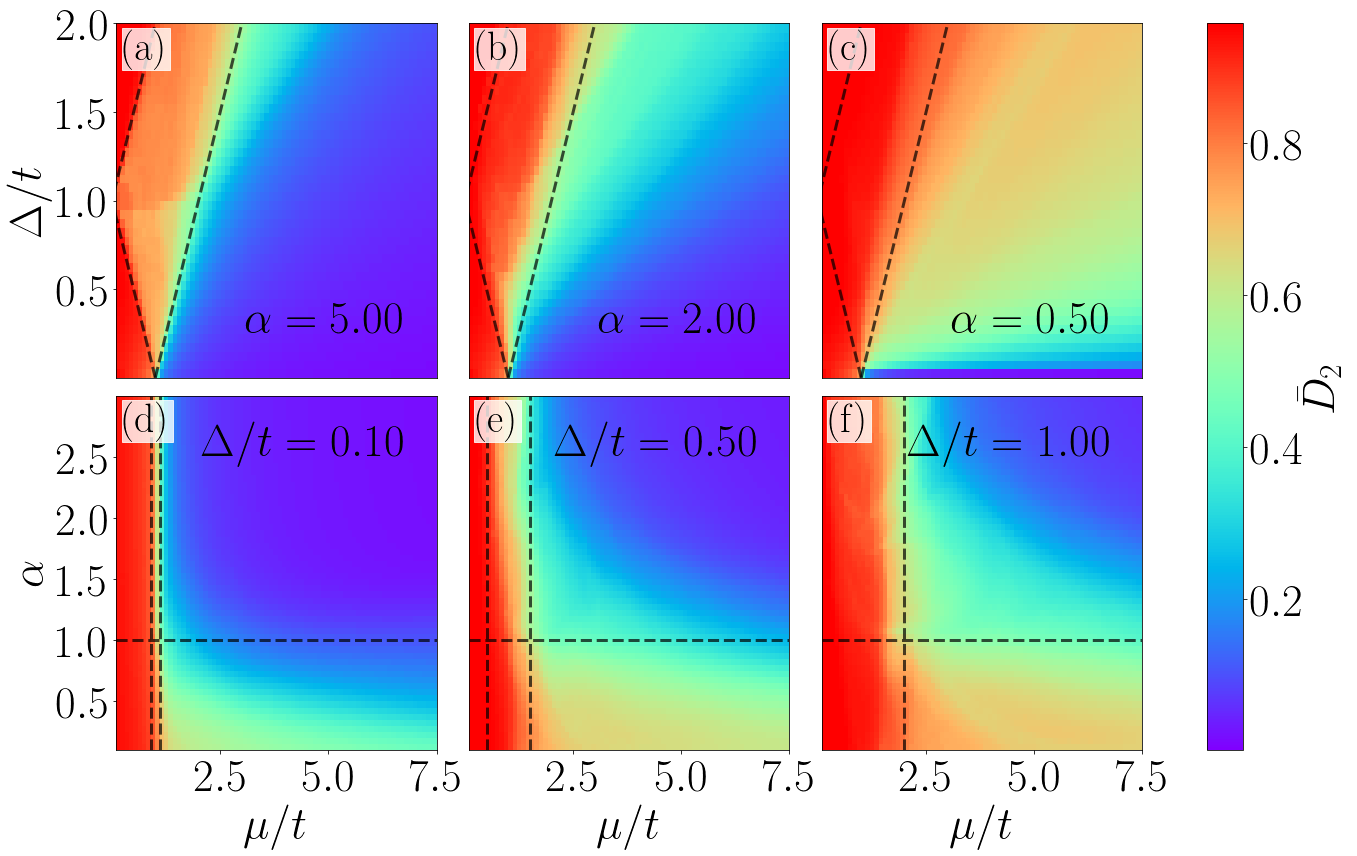

In [9]:
it = 14
Fn1, Fn = Fibonacci(it)

fig, axes = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=False, figsize=(20,12))
cmap = 'rainbow'
    
#########################################################

mu_list = np.linspace(0, 10, 100)[1:]
alpha_list = np.arange(0, 3.1, 0.05)
delta_list = [0.1, 0.5, 1]

tau_min=1
tau_max=0

for i,delta in enumerate(delta_list):

    name = 'LR_alpha_%.2f_delta_%.2f' %(alpha, delta)
    tau_map = np.load(path_data3 + 'IPR_ME_%s_it_%.0f.npy'%(name, it))
        
    for tau in tau_map:
        if tau.min()<tau_min:
            tau_min = tau.min()
        if tau.max()>tau_max:
            tau_max = tau.max()
            
for i,alpha in enumerate(alpha_list):

    name = 'LR_alpha_%.2f_delta_%.2f' %(alpha, delta)
    tau_map = np.load(path_data3 + 'IPR_ME_%s_it_%.0f.npy'%(name, it))
    
    for tau in tau_map:
        if tau.min()<tau_min:
            tau_min = tau.min()
        if tau.max()>tau_max:
            tau_max = tau.max()
            
norm = colors.Normalize(vmin=tau_min, vmax=tau_max)

for i,delta in enumerate(delta_list):

    ax = axes[1][i]
    ax.set_rasterization_zorder(0)
    
    mean = []
    alpha_list = np.arange(0, 3.1, 0.05)
    for alpha in alpha_list:        
        
        name = 'LR_alpha_%.2f_delta_%.2f' %(alpha, delta)

        IPR_map = np.load(path_data3 + 'IPR_ME_%s_it_%.0f.npy'%(name, it))
        IPR_map = abs(np.log(IPR_map[::-1]))/np.log(Fn)
        evals_total = np.load(path_data3 + 'evals_ME_%s_it_%.0f.npy'%(name, it))
        if len(mean) == 0:
            mean = np.mean(IPR_map, axis=0)
        else:
            mean = np.vstack((mean, np.mean(IPR_map, axis=0)))

    im = ax.pcolormesh(mu_list, alpha_list, mean, norm=norm, cmap=cmap, rasterized = True)
    ax.axhline(1, color='k', linestyle='--', linewidth=3, alpha=0.7)
    ax.axvline(abs(delta+1), color='k', linestyle='--', linewidth=3, alpha=0.7)
    ax.axvline(abs(delta-1), color='k', linestyle='--', linewidth=3, alpha=0.7)
    
    ax.set_xlim(0.1,7.5)
    ax.set_ylim(0.1, 3)
    if i > 0:
        ax.set_yticks([])
    else:
        ax.set_yticks([0.5, 1, 1.5, 2, 2.5])
        ax.set_ylabel(r'$\alpha$', fontsize=fs)

    ax.set_xlabel(r'$\mu/t$', fontsize=fs)
    #ax.set_xlabel(r'$\mu/t$', fontsize=fs)
    ax.text(0.9, 0.8, r'$\Delta/t = %.2f$' %delta,
            verticalalignment='bottom', horizontalalignment='right',
            color = 'k', transform=ax.transAxes, fontsize=fs)

##########################################################
mu_list = np.linspace(0, 10, 100)[1:]
delta_list = np.arange(0, 2.1, 0.05)
alpha_list = [5, 2, 0.5]
        
for i,alpha in enumerate(alpha_list):

    ax = axes[0][i]
    ax.set_rasterization_zorder(0)
    
    mean = []
    delta_list = np.arange(0, 2.1, 0.05)
    for delta in delta_list:

        name = 'LR_alpha_%.2f_delta_%.2f' %(alpha, delta)

        IPR_map = np.load(path_data3 + 'IPR_ME_%s_it_%.0f.npy'%(name, it))
        IPR_map = abs(np.log(IPR_map[::-1]))/np.log(Fn)
        evals_total = np.load(path_data3 + 'evals_ME_%s_it_%.0f.npy'%(name, it))
        if len(mean) == 0:
            mean = np.mean(IPR_map, axis=0)
        else:
            mean = np.vstack((mean, np.mean(IPR_map, axis=0)))

    im = ax.pcolormesh(mu_list, delta_list, mean, norm=norm, cmap=cmap, rasterized = True)
    ax.plot(abs(delta_list+1), delta_list, 'k--', linewidth=3, alpha=0.7)
    ax.plot(abs(delta_list-1), delta_list, 'k--', linewidth=3, alpha=0.7)
    
    if i > 0:
        ax.set_yticks([])
    else:
        ax.set_ylabel(r'$\Delta/t$', fontsize=fs)
        ax.set_yticks([0.5,1,1.5,2])

    #ax.set_xticks([1,2,3,4,5])
    ax.set_xlim(0.1,7.5)
    ax.set_ylim(0,2)
    
    ax.set_xticks([])
    ax.text(0.9, 0.1, r'$\alpha = %.2f$' %alpha,
            verticalalignment='bottom', horizontalalignment='right',
            color = 'k', transform=ax.transAxes, fontsize=fs)
    
#################################################################
plt.tight_layout()
cbar = plt.colorbar(im, ax=axes.ravel().tolist())
cbar.ax.set_ylabel(r'$\bar{D}_2$', fontsize=fs)

labels = ['(a)','(b)','(c)','(d)','(e)','(f)']
for ax,label in zip(axes.flat, labels):
    ax.text(0.02, 0.9, label, bbox={'facecolor': 'white', 'edgecolor': 'white', 'alpha': 0.8, 'pad':1}, transform=ax.transAxes, size=40,family='STIXGeneral')

#######################################################
fig.savefig(path_figures + 'phase_diagram.pdf',bbox_inches='tight')

# FIGURE 7 - CUT BANDS FOR LONG RANGE KITAEV CHAIN WITH AAH

In [3]:
path_data4 = path_data + 'fig_67/'

In [ ]:
## OLD

mu_list = np.linspace(0, 10, 100)[1:]
alpha_list = [0.5,2,5]
delta = 0.8
idx = 20

it = 18
Fn1, Fn = Fibonacci(it)

fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=False, figsize=(20,20))
cmap = 'rainbow'

nums_i = [[0,0.8], [0.8, 1.8],[1.8, 3],[3,10]]
nums_0 = [[0,1], [1, 1.4],[1.4, 1.8],[1.8, 3.6]]
position_y = [[0.07, 0.35, 0.54, 0.73],[0.05, 0.4, 0.62, 0.8],[0.05, 0.4, 0.62,0.8]]

##################################################33
for ja,alpha in enumerate(alpha_list):

    ax = axes[0][ja]
    ax.set_rasterization_zorder(0)

    name = 'LR_alpha_%.2f_delta_%.2f' %(alpha, delta)
    IPR_map = np.load(path_data4 + 'IPR_ME_%s_it_%.0f.npy'%(name, it))
    tau_map = abs(np.log(IPR_map[::-1]))/np.log(Fn)
    evals_total = np.load(path_data4 + 'evals_ME_%s_it_%.0f.npy'%(name, it))
 
    x = mu_list
    for i in range(len(evals_total.T)):   

        y = np.real(evals_total.T[i])
        tau = tau_map[i]

        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)

        norm = plt.Normalize(0,1)
        lc = LineCollection(segments, cmap=cmap, norm=norm, zorder=-1)
        lc.set_array(tau)
        lc.set_linewidth(2)
        line = ax.add_collection(lc)
    
    if ja == 0:
        nums = nums_0
    else:
        nums = nums_i
    
    evals_m = evals_total[idx]
    for j,num in enumerate(nums):
        linemax=[]
        for i,mu in enumerate(mu_list):
            
            evals = evals_total[i]
            evals_range = evals[(evals_m < num[1])&(evals_m > num[0])]
            linemax = np.append(linemax, evals_range[-1])
            
        ax.plot(mu_list,  linemax, '--', color='k', linewidth=3)
    
    ax.text(0.9, position_y[ja][0], r'$1$',
            verticalalignment='bottom', horizontalalignment='right',
            bbox={'facecolor': 'white', 'alpha': 0.7, 'pad':5},
            color = 'k', transform=ax.transAxes, fontsize=fs)
    ax.text(0.9, position_y[ja][1], r'$2$',
            verticalalignment='bottom', horizontalalignment='right',
            bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 5},
            color = 'k', transform=ax.transAxes, fontsize=fs)
    ax.text(0.9, position_y[ja][2], r'$3$',
            verticalalignment='bottom', horizontalalignment='right',
            bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 5},
            color = 'k', transform=ax.transAxes, fontsize=fs)
    ax.text(0.9, position_y[ja][3], r'$4$',
            verticalalignment='bottom', horizontalalignment='right',
            bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 5},
            color = 'k', transform=ax.transAxes, fontsize=fs)
    
    ax.set_ylim(0,10)
    ax.set_xlim(0.1,10)
    
    if ja == 0:
        ax.set_ylabel(r'$E/t$', fontsize=fs)
        ax.set_yticks([0,3,6,9])
    else:
        ax.set_yticks([])
        
    if ja == 3:
        cbar = plt.colorbar(lc, ax=ax)
        cbar.ax.set_ylabel(r'$\bar{D}_2$', fontsize=fs)
        
#############################################

color_list = ['lightcoral','dodgerblue','seagreen','goldenrod']
markers = ['o-', 's--', 'd:', '*-.']

for i, alpha in enumerate(alpha_list):

    ax = axes[1][i]
    ax.set_rasterization_zorder(0)
    if i == 0:
        nums = nums_0
    else:
        nums = nums_i
        
    for j,num in enumerate(nums):
    
        color = color_list[j]
        
        name = 'LR_alpha_%.2f_delta_%.2f' %(alpha, delta)
        IPR_map = np.load(path_data4 + 'IPR_ME_%s_it_%.0f.npy'%(name, it))
        D2_map = abs(np.log(IPR_map[::-1]))/np.log(Fn)
        evals_total = np.load(path_data4 + 'evals_ME_%s_it_%.0f.npy'%(name, it))
        
        D2_mean = []
        evals_m = evals_total[idx]
        for D2 in D2_map.T:   
            D2_mean = np.append(D2_mean, np.mean(D2[(abs(evals_m) < num[1])&(abs(evals_m) > num[0])]))

        ax.plot(mu_list[::2], D2_mean[::2], markers[j], color=color, linewidth=3, markersize=10, alpha=0.7, label=r'$i=%.0f$' %(j+1))
        
        ax.set_ylim(0,1.2)
        if i == 0:
            ax.set_ylabel(r'$\bar{D}_2^i$', fontsize=fs)
        else:
            ax.set_yticks([])
        
        ax.set_xlabel(r'$\mu/t$', fontsize=fs)
        if i == 2:
            ax.legend(fontsize=fs-15)
        ax.axhline(1, color = 'k', alpha=0.5, linestyle='--')

######################################################

plt.tight_layout()

labels = ['(a)','(b)','(c)','(d)','(e)','(f)']
for ax,label in zip(axes.flat, labels):
    ax.text(0.02, 0.9, label, bbox={'facecolor': 'white', 'edgecolor': 'white', 'alpha': 0.8, 'pad':1}, transform=ax.transAxes, size=40,family='STIXGeneral')
    
cbar = plt.colorbar(lc, ax=axes.ravel().tolist())
cbar.ax.set_ylabel(r'$D_2$', fontsize=fs)        
######################################################
fig.savefig(path_figures + 'bands.pdf',bbox_inches='tight')

/home/jfraxanet/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


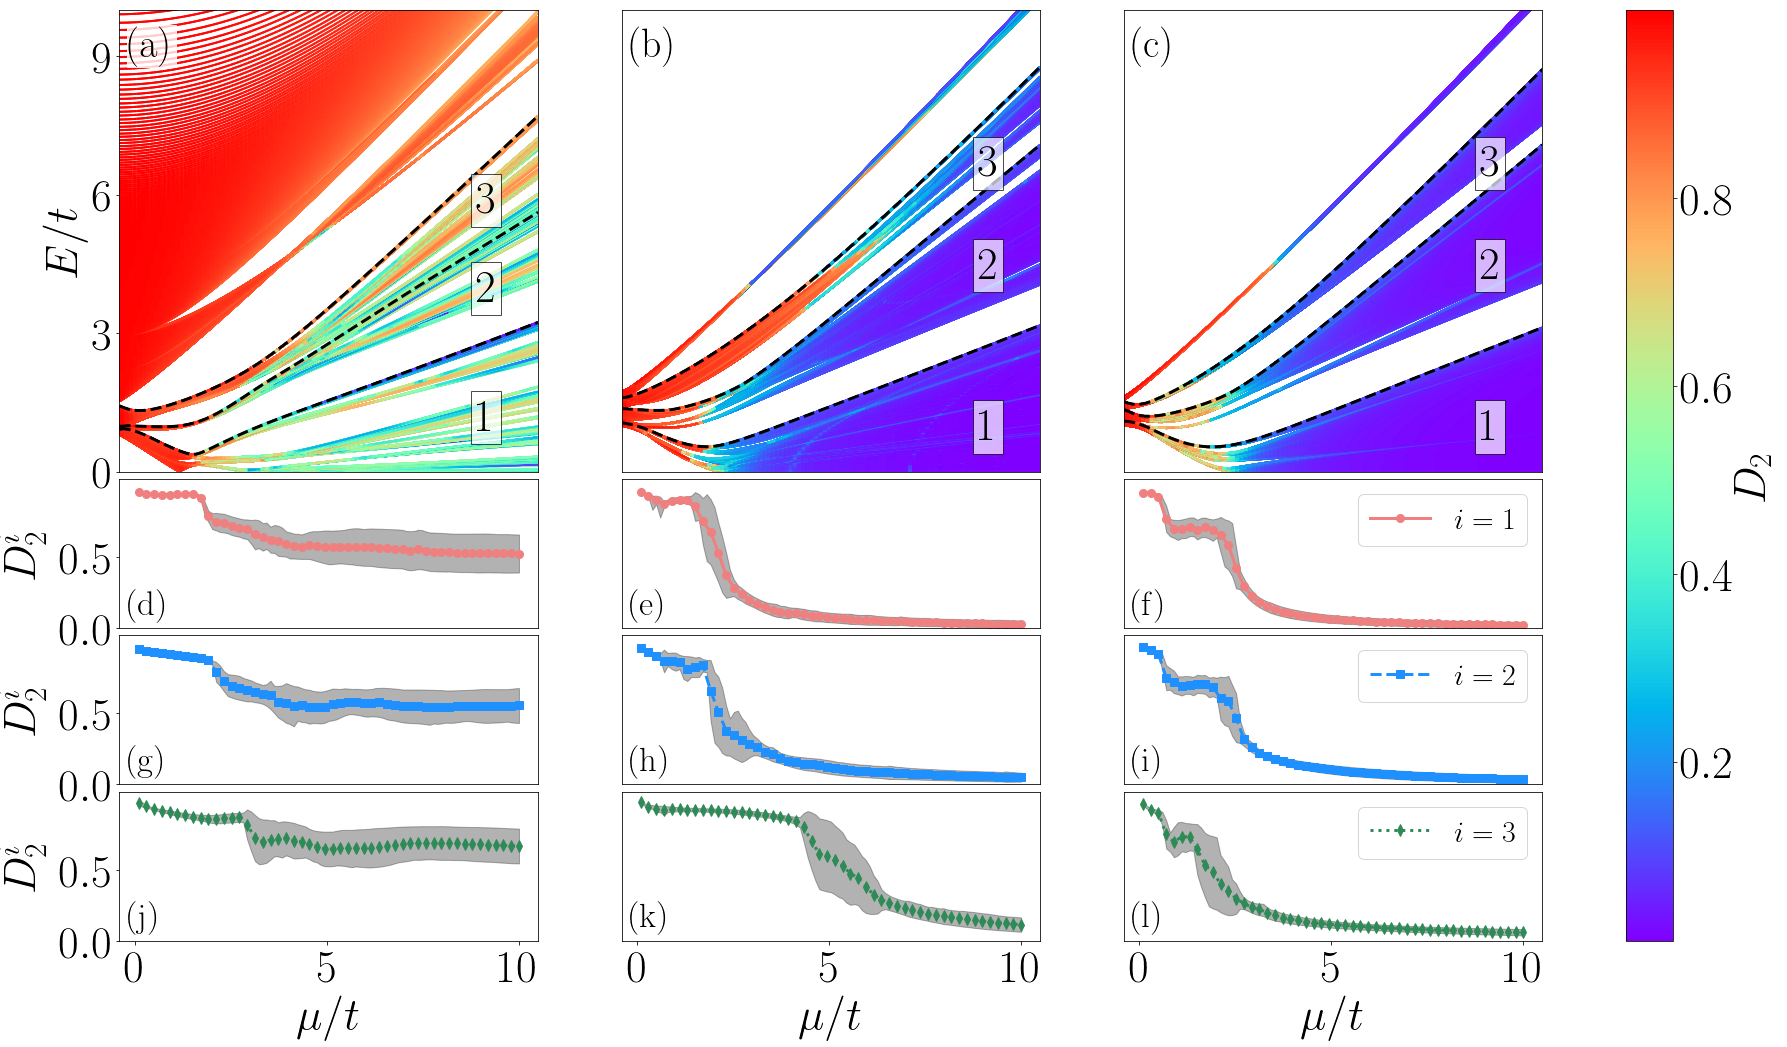

In [5]:
mu_list = np.linspace(0, 10, 100)[1:]
alpha_list = [0.5,2,5]
delta = 0.8
idx = 20

it = 18
Fn1, Fn = Fibonacci(it)

fig = plt.figure(figsize=(30, 20))

gs_plot = gridspec.GridSpec(7, 3, figure=fig)
gs_plot.update(hspace=0.05)
axes_list = []

cmap = 'rainbow'

nums_i = [[0,0.8], [0.8, 1.8],[1.8, 3]]
nums_0 = [[0,1], [1, 1.4],[1.4, 1.8]]
position_y = [[0.07, 0.35, 0.54, 0.73],[0.05, 0.4, 0.62, 0.8],[0.05, 0.4, 0.62,0.8]]

tau_min=1
tau_max=0
    
labels = ['(a)', '(b)', '(c)']
##################################################33
for ja,alpha in enumerate(alpha_list):

    ax = fig.add_subplot(gs_plot[0:3, ja])
    axes_list = np.append(axes_list, ax)
    ax.set_rasterization_zorder(0)

    name = 'LR_alpha_%.2f_delta_%.2f' %(alpha, delta)
    IPR_map = np.load(path_data4 + 'IPR_ME_%s_it_%.0f.npy'%(name, it))
    tau_map = abs(np.log(IPR_map[::-1]))/np.log(Fn)
    evals_total = np.load(path_data4 + 'evals_ME_%s_it_%.0f.npy'%(name, it))
    
    for tau in tau_map:
        if tau.min()<tau_min:
            tau_min = tau.min()
        if tau.max()>tau_max:
            tau_max = tau.max()
            
    x = mu_list
    for i in range(len(evals_total.T)):   

        y = np.real(evals_total.T[i])
        tau = tau_map[i]

        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)

        norm = colors.Normalize(vmin=tau_min, vmax=tau_max)
        lc = LineCollection(segments, cmap=cmap, norm=norm, zorder=-1)
        lc.set_array(tau)
        lc.set_linewidth(2)
        line = ax.add_collection(lc)
        
    if ja == 0:
        nums = nums_0
    else:
        nums = nums_i
    
    evals_m = evals_total[idx]
    for j,num in enumerate(nums):
        linemax=[]
        for i,mu in enumerate(mu_list):
            
            evals = evals_total[i]
            evals_range = evals[(evals_m < num[1])&(evals_m > num[0])]
            linemax = np.append(linemax, evals_range[-1])
            
        ax.plot(mu_list,  linemax, '--', color='k', linewidth=3)
    
    ax.text(0.9, position_y[ja][0], r'$1$',
            verticalalignment='bottom', horizontalalignment='right',
            bbox={'facecolor': 'white', 'alpha': 0.7, 'pad':5},
            color = 'k', transform=ax.transAxes, fontsize=fs)
    ax.text(0.9, position_y[ja][1], r'$2$',
            verticalalignment='bottom', horizontalalignment='right',
            bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 5},
            color = 'k', transform=ax.transAxes, fontsize=fs)
    ax.text(0.9, position_y[ja][2], r'$3$',
            verticalalignment='bottom', horizontalalignment='right',
            bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 5},
            color = 'k', transform=ax.transAxes, fontsize=fs)
    #ax.text(0.9, position_y[ja][3], r'$4$',
    #        verticalalignment='bottom', horizontalalignment='right',
    #        bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 5},
    #        color = 'k', transform=ax.transAxes, fontsize=fs)
    
    ax.set_ylim(0,10)
    ax.set_xlim(0.1,10)
    ax.set_xticks([])
    
    if ja == 0:
        ax.set_ylabel(r'$E/t$', fontsize=fs)
        ax.set_yticks([0,3,6,9])
    else:
        ax.set_yticks([])
        
    ax.text(0.02, 0.9, labels[ja], bbox={'facecolor': 'white', 'edgecolor': 
                                    'white', 'alpha': 0.8, 'pad':1}, transform=ax.transAxes, size=40,family='STIXGeneral')  

#############################################

cmap = 'rainbow'

nums_i = [[0,0.8], [0.8, 1.8],[1.8, 3]]
nums_0 = [[0,1], [1, 1.4],[1.4, 1.8]]
position_y = [[0.07, 0.35, 0.54, 0.73],[0.05, 0.4, 0.62, 0.8],[0.05, 0.4, 0.62,0.8]]

color_list = ['lightcoral','dodgerblue','seagreen','goldenrod']
markers = ['o-', 's--', 'd:', '*-.']
labels = np.array([['(d)', '(e)', '(f)'],['(g)', '(h)', '(i)'],['(j)', '(k)', '(l)']]).T


for i, alpha in enumerate(alpha_list):

    if i == 0:
        nums = nums_0
    else:
        nums = nums_i
        
    for j,num in enumerate(nums):
        
        ax = fig.add_subplot(gs_plot[j+3, i])
        axes_list = np.append(axes_list, ax)
        
        ax.set_rasterization_zorder(0)
    
        color = color_list[j]
        
        name = 'LR_alpha_%.2f_delta_%.2f' %(alpha, delta)
        IPR_map = np.load(path_data4 + 'IPR_ME_%s_it_%.0f.npy'%(name, it))
        D2_map = abs(np.log(IPR_map[::-1]))/np.log(Fn)
        evals_total = np.load(path_data4 + 'evals_ME_%s_it_%.0f.npy'%(name, it))
        
        D2_mean = D2_sigma = []
        evals_m = evals_total[idx]
        for D2 in D2_map.T:   
            D2_mean = np.append(D2_mean, np.mean(D2[(abs(evals_m) < num[1])&(abs(evals_m) > num[0])]))
            D2_sigma = np.append(D2_sigma, np.sqrt(np.var(D2[(abs(evals_m) < num[1])&(abs(evals_m) > num[0])])))
            
        ax.plot(mu_list[::2], D2_mean[::2], markers[j], color=color, linewidth=3, markersize=8, alpha=1, label=r'$i=%.0f$' %(j+1))
        #ax.errorbar(mu_list[::1], D2_mean[::1], yerr=D2_sigma[::1], color='k', alpha=0.7)
        ax.fill_between(mu_list, D2_mean-D2_sigma, D2_mean+D2_sigma, color='k', alpha=0.3)
        
        ax.set_ylim(0,1.05)
        if i == 0:
            ax.set_ylabel(r'$\bar{D}_2^i$', fontsize=fs)
            ax.set_yticks([0, 0.5])
        else:
            ax.set_yticks([])
        
        if j == 2:
            ax.set_xlabel(r'$\mu/t$', fontsize=fs)
            ax.set_xticks([0,5,10])
        else:
            ax.set_xticks([])
            
        if i == 2:
            ax.legend(fontsize=fs-15)
            
        ax.text(0.02, 0.1, labels[i][j], transform=ax.transAxes, size=35,family='STIXGeneral')
             
######################################################

cbar = plt.colorbar(lc, ax=axes_list, fraction=0.1)
cbar.ax.set_ylabel(r'$D_2$', fontsize=fs)

plt.tight_layout()
    
######################################################
fig.savefig(path_figures + 'bands.pdf',bbox_inches='tight')

# FIGURE 8 - ENERGY LEVEL SPACING

In [8]:
path_data4 = path_data + 'fig_67/'

/home/jfraxanet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/home/jfraxanet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log


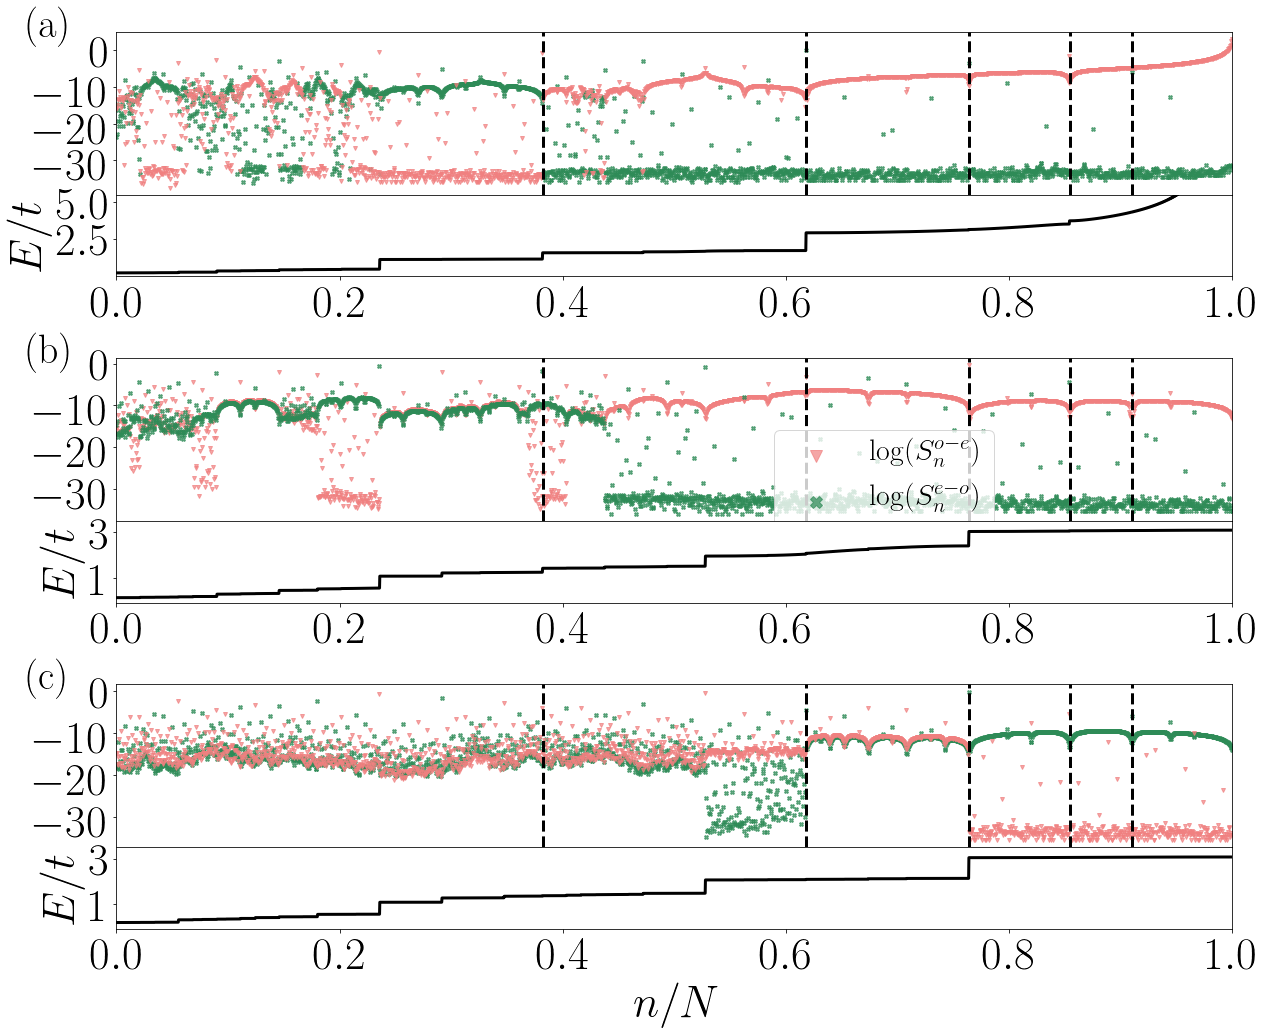

In [13]:
mu_list = np.linspace(0, 10, 100)[1:]
delta = 0.8

it = 18
Fn1, Fn = Fibonacci(it)

fig = plt.figure(figsize=(20, 18))

gs_plot = gridspec.GridSpec(12, 1, figure=fig)
#gs_plot.update(wspace=0.5)
gs_plot.update(hspace=0)

cmap = 'rainbow'
color_list = ['lightcoral','seagreen', 'lightcoral']
        
alpha_list = [0.5,2, 5]
mu_list = [2, 2, 2]

labels = ['(a)', '(b)', '(c)']
labels_data = [r'log($S_n^{o-e}$)', r'log($S_n^{e-o}$)', r'log($S_n^{o-e}$)']
markers = ['v', 'X', 'v']

ja = 0
for i,alpha in enumerate(alpha_list):

    ax = fig.add_subplot(gs_plot[2*ja:2*ja+2, 0])
    ax.set_rasterization_zorder(5)
    
    mu = mu_list[i]
    
    name = 'LR_alpha_%.2f_delta_%.2f' %(alpha, delta)
    evals_list = np.load(path_data4 + 'evals_ME_%s_it_%.0f_mu_%.2f.npy'%(name, it, mu))
    IPR_list = np.load(path_data4 + 'IPR_ME_%s_it_%.0f_mu_%.0f.npy'%(name, it, mu))
    #NPR_list = np.load(path_data4 + 'NPR_ME_%s_it_%.0f_mu_%.0f.npy'%(name, it, mu))
    
    IPR_list = IPR_list[evals_list>0]
    evals_list = evals_list[evals_list>0]
    odd_diff = even_diff = []

    for j in range(1,int(len(evals_list)/2)):

        odd_diff = np.append(odd_diff, evals_list[2*j]-evals_list[2*j-1])
        even_diff = np.append(even_diff, evals_list[2*j+1]-evals_list[2*j])

    ax.plot(np.arange(len(odd_diff))[::-1]/len(odd_diff), np.log(odd_diff)[::-1], markers[abs(i-1)], color=color_list[abs(i-1)], markersize= 4, alpha=0.7, label=labels_data[abs(i-1)])
    ax.plot(np.arange(len(even_diff))[::-1]/len(even_diff), np.log(even_diff)[::-1],markers[i], color=color_list[i], markersize = 4, alpha=0.7, label=labels_data[i])
    #ax1 = ax.twinx()
    #ax1.plot(np.arange(len(even_diff))/len(even_diff), abs(np.log(IPR_list[::2][2:]))/np.log(Fn),'o-', color='tab:blue', markersize = 4, alpha=0.7, label='IPR')
    ax.axvline(1-Fn1/Fn, color='k', linestyle='--', linewidth=3, alpha=1)
    ax.axvline(1-(Fn1/Fn)**2, color='k', linestyle='--', linewidth=3, alpha=1)
    ax.axvline(1-(Fn1/Fn)**3, color='k', linestyle='--', linewidth=3, alpha=1)
    ax.axvline(1-(Fn1/Fn)**4, color='k', linestyle='--', linewidth=3, alpha=1)
    ax.axvline(1-(Fn1/Fn)**5, color='k', linestyle='--', linewidth=3, alpha=1)

    ax1 = fig.add_subplot(gs_plot[2*ja+2:2*ja+3, 0])
    evals_list = evals_list[::-1]
    ax1.plot(np.arange(len(evals_list))/len(evals_list), evals_list[::-1], 'k-', linewidth= 3, alpha=1, label=labels_data[abs(i-1)])
    if i==0:
        ax1.set_ylim(-0.1,5.5)
        ax1.set_yticks([2.5,5])
    if i==1:
        ax1.set_ylim(-0.1,3.5)
        ax1.set_yticks([1,3])
    if i==2:
        ax1.set_ylim(-0.1,3.5)
        ax1.set_yticks([1,3])
        
    ax1.set_xlim(0,1)
    ax1.set_ylabel(r'$E/t$', fontsize=fs) 
    
    ax.set_yticks([0,-10,-20,-30])
    ax.set_xticks([])
    ax.set_xlim(0,1)
    if i == 2:
        ax1.set_xlabel(r'$n/N$', fontsize=fs) 
    if i == 1:
        ax.legend(fontsize=fs-15, markerscale=3, loc=1, bbox_to_anchor=(0.8,0.65))
        
    #ax.text(0.97, 0.05, r'$    \alpha = %.1f \\ \mu/t = %.1f$' %(alpha, mu),
    #    verticalalignment='bottom', horizontalalignment='right',
    #    bbox={'facecolor': 'white', 'edgecolor': 'white', 'alpha': 0.5, 'pad': 5},
    #    color = 'k', transform=ax.transAxes, fontsize=fs-10)
    
    ax.text(-0.08, 0.97, labels[i],transform= ax.transAxes, size=40,family='STIXGeneral')
    
    ja += 2
######################################################
fig.savefig(path_figures + 'els.pdf',bbox_inches='tight')

# FIGURE 9 - ?

In [3]:
path_data4 = path_data + 'fig_67/'

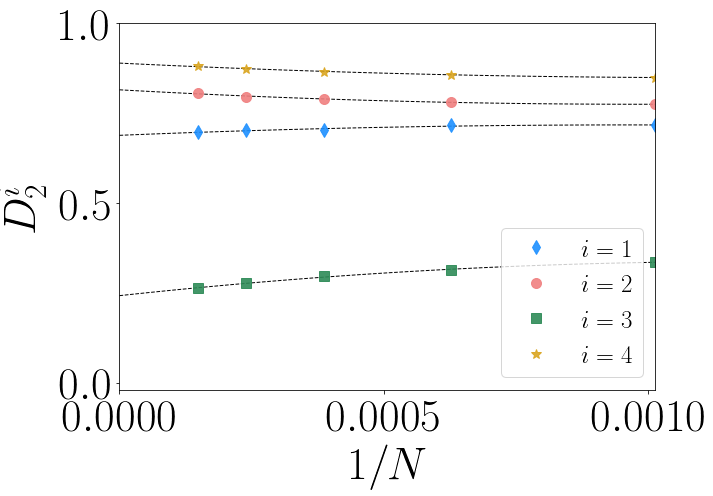

In [4]:
iterations = np.array([15,16,17,18,19])
mu = 2
alpha = 5
delta = 0.8
L = 1

Fn_list = []

IPR_mean1 = IPR_mean2 = IPR_mean3 = IPR_mean4 = []
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False, figsize=(10, 7,))

color_list = ['lightcoral','dodgerblue','seagreen','goldenrod']
markers = ['o', 'd', 's', '*']
for it in iterations:
    
    name = 'LR_alpha_%.2f_delta_%.2f' %(alpha, delta)

    Fn1, Fn = Fibonacci(it)
    Fn_list = np.append(Fn_list, Fn)
    length = 1

    IPR = np.load(path_cluster + 'IPR_ME_%s_it_%.0f_mu_%.0f.npy'%(name, it, mu))
    evals = np.load(path_cluster + 'evals_ME_%s_it_%.0f_mu_%.0f.npy'%(name, it, mu))

    IPR = IPR[evals>0]
    evals = evals[evals>0]
    
    IPR_new = IPR    
    
    IPR_new1 = IPR_new[Fn1-int(0.09*Fn):Fn1]
    IPR_mean1 = np.append(IPR_mean1, np.mean(abs(np.log(IPR_new1)/np.log(Fn))))
    
    IPR_new2 = IPR_new[0:Fn1-int(0.09*Fn)]
    IPR_mean2 = np.append(IPR_mean2, np.mean(abs(np.log(IPR_new2)/np.log(Fn))))
    
    IPR_new3 = IPR_new[Fn1:Fn1+int(0.145*Fn)]
    IPR_mean3 = np.append(IPR_mean3, np.mean(abs(np.log(IPR_new3)/np.log(Fn))))
    
    IPR_new4 = IPR_new[Fn1+int(0.145*Fn):]
    IPR_mean4 = np.append(IPR_mean4, np.mean(abs(np.log(IPR_new4)/np.log(Fn))))

    if it == 21:
        ax = axes[0]
        ax.plot(np.arange(Fn)[Fn1-int(0.09*Fn):Fn1]/Fn, abs(np.log(IPR_new1)/np.log(Fn)), '.-', color=color_list[0], linewidth=2)
        ax.plot(np.arange(Fn)[0:Fn1-int(0.09*Fn)]/Fn, abs(np.log(IPR_new2)/np.log(Fn)), '.-', color=color_list[1], linewidth=2)
        ax.plot(np.arange(Fn)[Fn1:Fn1+int(0.145*Fn)]/Fn, abs(np.log(IPR_new3)/np.log(Fn)), '.-', color=color_list[2], linewidth=2)
        ax.plot(np.arange(Fn)[Fn1+int(0.145*Fn):]/Fn, abs(np.log(IPR_new4)/np.log(Fn)), '.-', color=color_list[3], linewidth=2)
        ax.axvline(Fn1/Fn, color='k', linestyle='--', linewidth=3, alpha=1)
        ax.axvline((Fn1-int(0.09*Fn))/Fn, color='k', linestyle='--', linewidth=3, alpha=1)    
        ax.axvline((Fn1+int(0.145*Fn))/Fn, color='k', linestyle='--', linewidth=3, alpha=1)   
        ax.set_xlim((Fn1-int(0.35*Fn))/Fn, (Fn-int(0.05*Fn))/Fn)
        ax.set_ylim(0,1)
        ax.set_xlabel(r'$n/N$', fontsize=fs)
        ax.set_ylabel(r'$D_2$', fontsize=fs)
        
        ax.text(0.1, 0.2, r'$1$',
            verticalalignment='bottom', horizontalalignment='right',
            bbox={'facecolor': 'white', 'alpha': 0.7, 'pad':5},
            color = 'k', transform=ax.transAxes, fontsize=fs)
        ax.text(0.46, 0.3, r'$2$',
            verticalalignment='bottom', horizontalalignment='right',
            bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 5},
            color = 'k', transform=ax.transAxes, fontsize=fs)
        ax.text(0.6, 0.7, r'$3$',
            verticalalignment='bottom', horizontalalignment='right',
            bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 5},
            color = 'k', transform=ax.transAxes, fontsize=fs)
        ax.text(0.9, 0.5, r'$4$',
            verticalalignment='bottom', horizontalalignment='right',
            bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 5},
            color = 'k', transform=ax.transAxes, fontsize=fs)
        
coef = np.polyfit(1/np.array(Fn_list), IPR_mean2, deg=2)
x = np.linspace(0,1/Fn_list[0])
ax.plot(x, coef[0]*x**2 + coef[1]*x + coef[2], '--', color='black', linewidth=1, alpha=1)
ax.plot(1/Fn_list, IPR_mean2, markers[1], color=color_list[1], markersize=10, linewidth=2, alpha=0.9, label = r'$i=1$')

coef = np.polyfit(1/np.array(Fn_list), IPR_mean1, deg=2)
x = np.linspace(0,1/Fn_list[0])
ax.plot(x, coef[0]*x**2 + coef[1]*x + coef[2], '--', color='black', linewidth=1, alpha=1)
ax.plot(1/Fn_list, IPR_mean1, markers[0], color=color_list[0], markersize=10, linewidth=2, alpha=0.9, label = r'$i=2$') 

coef = np.polyfit(1/np.array(Fn_list), IPR_mean3, deg=2)
x = np.linspace(0,1/Fn_list[0])
ax.plot(x, coef[0]*x**2 + coef[1]*x + coef[2], '--', color='black', linewidth=1, alpha=1)
ax.plot(1/Fn_list, IPR_mean3, markers[2], color=color_list[2], markersize=10, linewidth=2, alpha=0.9, label = r'$i=3$')

coef = np.polyfit(1/np.array(Fn_list), IPR_mean4, deg=2)
x = np.linspace(0,1/Fn_list[0])
ax.plot(x, coef[0]*x**2 + coef[1]*x + coef[2], '--', color='black', linewidth=1, alpha=1)
ax.plot(1/Fn_list, IPR_mean4, markers[3], color=color_list[3], markersize=10, linewidth=2, alpha=0.9, label = r'$i=4$')

ax.set_xlim(0, 1/Fn_list[0])
ax.set_ylim(-0.02,1)
ax.set_xlabel(r'$1/N$', fontsize=fs)
ax.set_ylabel(r'$\bar{D}_2^i$', fontsize=fs)
ax.legend(fontsize=fs-20, loc='lower right')  

plt.tight_layout()
plt.savefig(path_figures + 'scaling.pdf',bbox_inches='tight')

/home/jfraxanet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/home/jfraxanet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/home/jfraxanet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:84: VisibleDeprecationWarning: Passing `normed=True` on non-uniform 

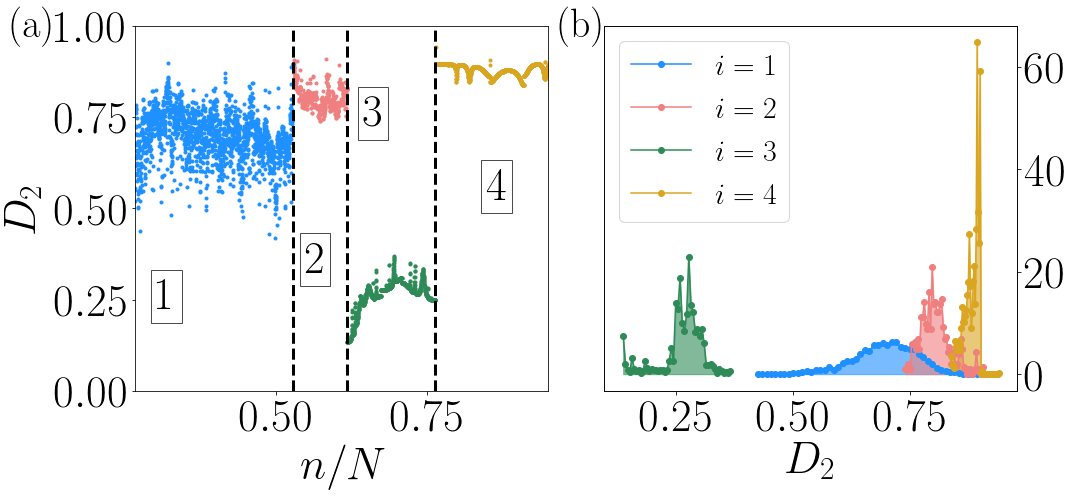

In [5]:
iterations = np.array([15,16,17,18,19])
mu = 2
alpha = 5
delta = 0.8
L = 1

Fn_list = []

IPR_mean1 = IPR_mean2 = IPR_mean3 = IPR_mean4 = []
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(15, 7,))

color_list = ['lightcoral','dodgerblue','seagreen','goldenrod']
markers = ['o', 'd', 's', '*']
for it in iterations:
    
    name = 'LR_alpha_%.2f_delta_%.2f' %(alpha, delta)

    Fn1, Fn = Fibonacci(it)
    Fn_list = np.append(Fn_list, Fn)
    length = 1

    IPR = np.load(path_cluster + 'IPR_ME_%s_it_%.0f_mu_%.0f.npy'%(name, it, mu))
    evals = np.load(path_cluster + 'evals_ME_%s_it_%.0f_mu_%.0f.npy'%(name, it, mu))

    IPR = IPR[evals>0]
    evals = evals[evals>0]
    
    IPR_new = IPR    
    
    IPR_new1 = abs(np.log(IPR_new[Fn1-int(0.09*Fn):Fn1])/np.log(Fn))
    IPR_mean1 = np.append(IPR_mean1, np.mean(IPR_new1))
    
    IPR_new2 = abs(np.log(IPR_new[0:Fn1-int(0.09*Fn)])/np.log(Fn))
    IPR_mean2 = np.append(IPR_mean2, np.mean(IPR_new2))
    
    IPR_new3 = abs(np.log(IPR_new[Fn1:Fn1+int(0.146*Fn)])/np.log(Fn))
    IPR_mean3 = np.append(IPR_mean3, np.mean(IPR_new3))
    
    IPR_new4 = abs(np.log(IPR_new[Fn1+int(0.146*Fn):])/np.log(Fn))
    IPR_mean4 = np.append(IPR_mean4, np.mean(IPR_new4))

    if it == 19:
        ax = axes[0]
        ax.plot(np.arange(Fn)[Fn1-int(0.09*Fn):Fn1]/Fn, IPR_new1, '.', color=color_list[0], linewidth=2)
        ax.plot(np.arange(Fn)[0:Fn1-int(0.09*Fn)]/Fn, IPR_new2, '.', color=color_list[1], linewidth=2)
        ax.plot(np.arange(Fn)[Fn1:Fn1+int(0.146*Fn)]/Fn, IPR_new3, '.', color=color_list[2], linewidth=2)
        ax.plot(np.arange(Fn)[Fn1+int(0.146*Fn):]/Fn, IPR_new4, '.', color=color_list[3], linewidth=2)
        ax.axvline(Fn1/Fn, color='k', linestyle='--', linewidth=3, alpha=1)
        ax.axvline((Fn1-int(0.09*Fn))/Fn, color='k', linestyle='--', linewidth=3, alpha=1)    
        ax.axvline((Fn1+int(0.145*Fn))/Fn, color='k', linestyle='--', linewidth=3, alpha=1)   
        ax.set_xlim((Fn1-int(0.35*Fn))/Fn, (Fn-int(0.05*Fn))/Fn)
        
        ax.set_ylim(0,1)
        ax.set_xlabel(r'$n/N$', fontsize=fs)
        ax.set_ylabel(r'$D_2$', fontsize=fs)
        
        ax.text(0.1, 0.2, r'$1$',
            verticalalignment='bottom', horizontalalignment='right',
            bbox={'facecolor': 'white', 'alpha': 0.7, 'pad':5},
            color = 'k', transform=ax.transAxes, fontsize=fs)
        ax.text(0.46, 0.3, r'$2$',
            verticalalignment='bottom', horizontalalignment='right',
            bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 5},
            color = 'k', transform=ax.transAxes, fontsize=fs)
        ax.text(0.6, 0.7, r'$3$',
            verticalalignment='bottom', horizontalalignment='right',
            bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 5},
            color = 'k', transform=ax.transAxes, fontsize=fs)
        ax.text(0.9, 0.5, r'$4$',
            verticalalignment='bottom', horizontalalignment='right',
            bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 5},
            color = 'k', transform=ax.transAxes, fontsize=fs)
        
        ax.text(-0.3, 0.97, '(a)' ,transform= ax.transAxes, size=40,family='STIXGeneral')
        
        ax = axes[1]
        ax.set_yticks([])
        ax.set_xlabel(r'$D_2$', fontsize=fs)        
        ax = ax.twinx()

        bins= 50
        hist1, bin_edges1 = np.histogram(IPR_new1, bins=bins, normed=True)
        hist2, bin_edges2 = np.histogram(IPR_new2, bins=bins, normed=True)
        hist3, bin_edges3 = np.histogram(IPR_new3, bins=bins, normed=True)
        hist4, bin_edges4 = np.histogram(IPR_new4, bins=bins, normed=True)

            
        ax.plot((bin_edges2[1:]+bin_edges2[:-1])/2, hist2, 'o-',  color=color_list[1], label = r'$i=1$') 
        ax.fill_between((bin_edges2[1:]+bin_edges2[:-1])/2, hist2, 0, color=color_list[1], alpha=0.6)
        
        ax.plot((bin_edges1[1:]+bin_edges1[:-1])/2, hist1, 'o-',  color=color_list[0], label = r'$i=2$') 
        ax.fill_between((bin_edges1[1:]+bin_edges1[:-1])/2, hist1, 0, color=color_list[0], alpha=0.6)

        ax.plot((bin_edges3[1:]+bin_edges3[:-1])/2, hist3, 'o-',  color=color_list[2], label = r'$i=3$') 
        ax.fill_between((bin_edges3[1:]+bin_edges3[:-1])/2, hist3, 0, color=color_list[2], alpha=0.6)
        
        ax.plot((bin_edges4[1:]+bin_edges4[:-1])/2, hist4, 'o-',  color=color_list[3], label = r'$i=4$') 
        ax.fill_between((bin_edges4[1:]+bin_edges4[:-1])/2, hist4, 0, color=color_list[3], alpha=0.6)

        ax.legend(fontsize=fs-15)  
        
    ax.text(-0.11, 0.97, '(b)' ,transform= ax.transAxes, size=40,family='STIXGeneral')
    
plt.tight_layout()
plt.savefig(path_figures + 'hist_D2.pdf',bbox_inches='tight')

/home/jfraxanet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:80: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/home/jfraxanet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/home/jfraxanet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: VisibleDeprecationWarning: Passing `normed=True` on non-uniform 

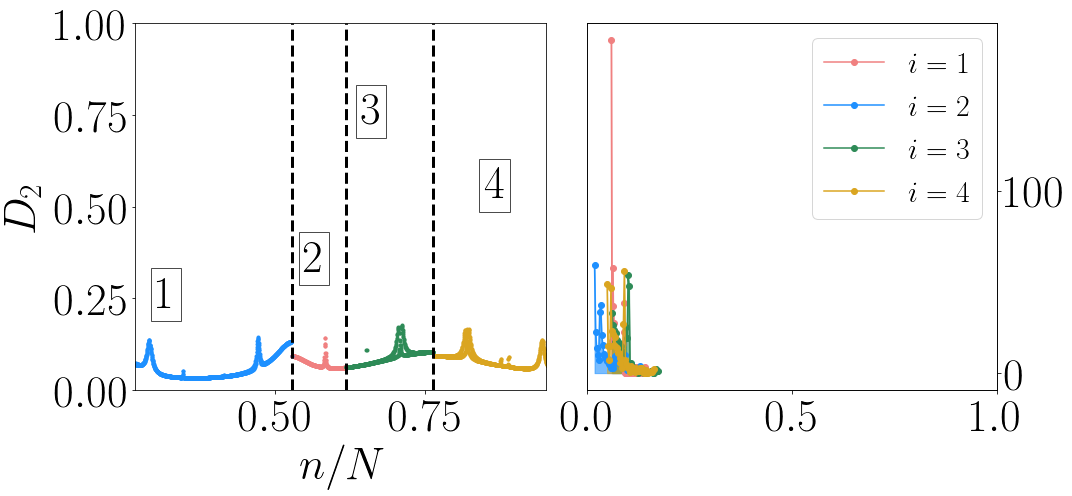

In [15]:
iterations = np.array([18])
mu = 2
alpha = 5
delta = 0.8
L = 1

Fn_list = []

IPR_mean1 = IPR_mean2 = IPR_mean3 = IPR_mean4 = []
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(15, 7,))

color_list = ['lightcoral','dodgerblue','seagreen','goldenrod']
markers = ['o', 'd', 's', '*']
for it in iterations:
    
    name = 'LR_alpha_%.2f_delta_%.2f' %(alpha, delta)

    Fn1, Fn = Fibonacci(it)
    Fn_list = np.append(Fn_list, Fn)
    length = 1
    
    name = 'LR_alpha_%.2f_delta_%.2f' %(alpha, delta)
    IPR = np.load(path_data4 + 'IPR_ME_%s_it_%.0f.npy'%(name, it)).T[70]
    evals = np.load(path_data4 + 'evals_ME_%s_it_%.0f.npy'%(name, it))[70]

    IPR = IPR[evals>0]
    evals = evals[evals>0]
    
    IPR_new = IPR    
    
    IPR_new1 = abs(np.log(IPR_new[Fn1-int(0.09*Fn):Fn1])/np.log(Fn))
    IPR_mean1 = np.append(IPR_mean1, np.mean(IPR_new1))
    
    IPR_new2 = abs(np.log(IPR_new[0:Fn1-int(0.09*Fn)])/np.log(Fn))
    IPR_mean2 = np.append(IPR_mean2, np.mean(IPR_new2))
    
    IPR_new3 = abs(np.log(IPR_new[Fn1:Fn1+int(0.146*Fn)])/np.log(Fn))
    IPR_mean3 = np.append(IPR_mean3, np.mean(IPR_new3))
    
    IPR_new4 = abs(np.log(IPR_new[Fn1+int(0.146*Fn):])/np.log(Fn))
    IPR_mean4 = np.append(IPR_mean4, np.mean(IPR_new4))
    
    if it == 18:
        ax = axes[0]
        ax.plot(np.arange(Fn)[Fn1-int(0.09*Fn):Fn1]/Fn, IPR_new1, '.', color=color_list[0], linewidth=2)
        ax.plot(np.arange(Fn)[0:Fn1-int(0.09*Fn)]/Fn, IPR_new2, '.', color=color_list[1], linewidth=2)
        ax.plot(np.arange(Fn)[Fn1:Fn1+int(0.146*Fn)]/Fn, IPR_new3, '.', color=color_list[2], linewidth=2)
        ax.plot(np.arange(Fn)[Fn1+int(0.146*Fn):]/Fn, IPR_new4, '.', color=color_list[3], linewidth=2)
        ax.axvline(Fn1/Fn, color='k', linestyle='--', linewidth=3, alpha=1)
        ax.axvline((Fn1-int(0.09*Fn))/Fn, color='k', linestyle='--', linewidth=3, alpha=1)    
        ax.axvline((Fn1+int(0.145*Fn))/Fn, color='k', linestyle='--', linewidth=3, alpha=1)   
        ax.set_xlim((Fn1-int(0.35*Fn))/Fn, (Fn-int(0.05*Fn))/Fn)
        
        ax.set_ylim(0,1)
        ax.set_xlabel(r'$n/N$', fontsize=fs)
        ax.set_ylabel(r'$D_2$', fontsize=fs)
        
        ax.text(0.1, 0.2, r'$1$',
            verticalalignment='bottom', horizontalalignment='right',
            bbox={'facecolor': 'white', 'alpha': 0.7, 'pad':5},
            color = 'k', transform=ax.transAxes, fontsize=fs)
        ax.text(0.46, 0.3, r'$2$',
            verticalalignment='bottom', horizontalalignment='right',
            bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 5},
            color = 'k', transform=ax.transAxes, fontsize=fs)
        ax.text(0.6, 0.7, r'$3$',
            verticalalignment='bottom', horizontalalignment='right',
            bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 5},
            color = 'k', transform=ax.transAxes, fontsize=fs)
        ax.text(0.9, 0.5, r'$4$',
            verticalalignment='bottom', horizontalalignment='right',
            bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 5},
            color = 'k', transform=ax.transAxes, fontsize=fs)
        
        ax = axes[1]
        ax.set_yticks([])
        ax = ax.twinx()

        bins= 50
        hist1, bin_edges1 = np.histogram(IPR_new1, bins=bins, normed=True)
        hist2, bin_edges2 = np.histogram(IPR_new2, bins=bins, normed=True)
        hist3, bin_edges3 = np.histogram(IPR_new3, bins=bins, normed=True)
        hist4, bin_edges4 = np.histogram(IPR_new4, bins=bins, normed=True)

        ax.plot((bin_edges1[1:]+bin_edges1[:-1])/2, hist1, 'o-',  color=color_list[0], label = r'$i=1$') 
        ax.fill_between((bin_edges1[1:]+bin_edges1[:-1])/2, hist1, 0, color=color_list[0], alpha=0.6)
        
        ax.plot((bin_edges2[1:]+bin_edges2[:-1])/2, hist2, 'o-',  color=color_list[1], label = r'$i=2$') 
        ax.fill_between((bin_edges2[1:]+bin_edges2[:-1])/2, hist2, 0, color=color_list[1], alpha=0.6)
        
        ax.plot((bin_edges3[1:]+bin_edges3[:-1])/2, hist3, 'o-',  color=color_list[2], label = r'$i=3$') 
        ax.fill_between((bin_edges3[1:]+bin_edges3[:-1])/2, hist3, 0, color=color_list[2], alpha=0.6)
        
        ax.plot((bin_edges4[1:]+bin_edges4[:-1])/2, hist4, 'o-',  color=color_list[3], label = r'$i=4$') 
        ax.fill_between((bin_edges4[1:]+bin_edges4[:-1])/2, hist4, 0, color=color_list[3], alpha=0.6)
        
        ax.set_xlabel(r'$\bar{D}_2^i$', fontsize=fs)
        ax.legend(fontsize=fs-15)  
        ax.set_xlim(0,1)

plt.tight_layout()
plt.savefig(path_figures + 'scaling_D2.pdf',bbox_inches='tight')

In [ ]:
mu_list = np.linspace(0, 10, 100)[1:]
alpha_list = [0.5,2,5]
delta = 0.8
idx = 20

it = 18
Fn1, Fn = Fibonacci(it)

fig = plt.figure(figsize=(30, 20))

gs_plot = gridspec.GridSpec(7, 3, figure=fig)
gs_plot.update(hspace=0.05)
axes_list = []

cmap = 'rainbow'

nums_i = [[0,0.8], [0.8, 1.8],[1.8, 3]]
nums_0 = [[0,1], [1, 1.4],[1.4, 1.8]]
position_y = [[0.07, 0.35, 0.54, 0.73],[0.05, 0.4, 0.62, 0.8],[0.05, 0.4, 0.62,0.8]]

tau_min=1
tau_max=0
    
labels = ['(a)', '(b)', '(c)']
##################################################33
for ja,alpha in enumerate(alpha_list):

    ax = fig.add_subplot(gs_plot[0:3, ja])
    axes_list = np.append(axes_list, ax)
    ax.set_rasterization_zorder(0)

    name = 'LR_alpha_%.2f_delta_%.2f' %(alpha, delta)
    IPR_map = np.load(path_data4 + 'IPR_ME_%s_it_%.0f.npy'%(name, it))
    tau_map = abs(np.log(IPR_map[::-1]))/np.log(Fn)
    evals_total = np.load(path_data4 + 'evals_ME_%s_it_%.0f.npy'%(name, it))
    
    for tau in tau_map:
        if tau.min()<tau_min:
            tau_min = tau.min()
        if tau.max()>tau_max:
            tau_max = tau.max()
            
    x = mu_list
    for i in range(len(evals_total.T)):   

        y = np.real(evals_total.T[i])
        tau = tau_map[i]

        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)

        norm = colors.Normalize(vmin=tau_min, vmax=tau_max)
        lc = LineCollection(segments, cmap=cmap, norm=norm, zorder=-1)
        lc.set_array(tau)
        lc.set_linewidth(2)
        line = ax.add_collection(lc)
        
    if ja == 0:
        nums = nums_0
    else:
        nums = nums_i
    
    evals_m = evals_total[idx]
    for j,num in enumerate(nums):
        linemax=[]
        for i,mu in enumerate(mu_list):
            
            evals = evals_total[i]
            evals_range = evals[(evals_m < num[1])&(evals_m > num[0])]
            linemax = np.append(linemax, evals_range[-1])
            
        ax.plot(mu_list,  linemax, '--', color='k', linewidth=3)
    
    ax.text(0.9, position_y[ja][0], r'$1$',
            verticalalignment='bottom', horizontalalignment='right',
            bbox={'facecolor': 'white', 'alpha': 0.7, 'pad':5},
            color = 'k', transform=ax.transAxes, fontsize=fs)
    ax.text(0.9, position_y[ja][1], r'$2$',
            verticalalignment='bottom', horizontalalignment='right',
            bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 5},
            color = 'k', transform=ax.transAxes, fontsize=fs)
    ax.text(0.9, position_y[ja][2], r'$3$',
            verticalalignment='bottom', horizontalalignment='right',
            bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 5},
            color = 'k', transform=ax.transAxes, fontsize=fs)
    #ax.text(0.9, position_y[ja][3], r'$4$',
    #        verticalalignment='bottom', horizontalalignment='right',
    #        bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 5},
    #        color = 'k', transform=ax.transAxes, fontsize=fs)
    
    ax.set_ylim(0,10)
    ax.set_xlim(0.1,10)
    ax.set_xticks([])
    
    if ja == 0:
        ax.set_ylabel(r'$E/t$', fontsize=fs)
        ax.set_yticks([0,3,6,9])
    else:
        ax.set_yticks([])
        
    ax.text(0.02, 0.9, labels[ja], bbox={'facecolor': 'white', 'edgecolor': 
                                    'white', 'alpha': 0.8, 'pad':1}, transform=ax.transAxes, size=40,family='STIXGeneral')  

#############################################

cmap = 'rainbow'

nums_i = [[0,0.8], [0.8, 1.8],[1.8, 3]]
nums_0 = [[0,1], [1, 1.4],[1.4, 1.8]]
position_y = [[0.07, 0.35, 0.54, 0.73],[0.05, 0.4, 0.62, 0.8],[0.05, 0.4, 0.62,0.8]]

color_list = ['lightcoral','dodgerblue','seagreen','goldenrod']
markers = ['o-', 's--', 'd:', '*-.']
labels = [['(d)', '(e)', '(f)'],['(g)', '(h)', '(i)'],['(j)', '(k)', '(l)']]


for i, alpha in enumerate(alpha_list):

    if i == 0:
        nums = nums_0
    else:
        nums = nums_i
        
    for j,num in enumerate(nums):
        
        ax = fig.add_subplot(gs_plot[j+3, i])
        axes_list = np.append(axes_list, ax)
        
        ax.set_rasterization_zorder(0)
    
        color = color_list[j]
        
        name = 'LR_alpha_%.2f_delta_%.2f' %(alpha, delta)
        IPR_map = np.load(path_data4 + 'IPR_ME_%s_it_%.0f.npy'%(name, it))
        D2_map = abs(np.log(IPR_map[::-1]))/np.log(Fn)
        evals_total = np.load(path_data4 + 'evals_ME_%s_it_%.0f.npy'%(name, it))
        
        D2_mean = D2_sigma = []
        evals_m = evals_total[idx]
        for D2 in D2_map.T:   
            D2_mean = np.append(D2_mean, np.mean(D2[(abs(evals_m) < num[1])&(abs(evals_m) > num[0])]))
            D2_sigma = np.append(D2_sigma, np.sqrt(np.var(D2[(abs(evals_m) < num[1])&(abs(evals_m) > num[0])])))
            
        ax.plot(mu_list[::2], D2_mean[::2], markers[j], color=color, linewidth=3, markersize=8, alpha=1, label=r'$i=%.0f$' %(j+1))
        #ax.errorbar(mu_list[::1], D2_mean[::1], yerr=D2_sigma[::1], color='k', alpha=0.7)
        ax.fill_between(mu_list, D2_mean-D2_sigma, D2_mean+D2_sigma, color='k', alpha=0.3)
        
        ax.set_ylim(0,1.05)
        if i == 0:
            ax.set_ylabel(r'$\bar{D}_2^i$', fontsize=fs)
            ax.set_yticks([0, 0.5])
        else:
            ax.set_yticks([])
        
        if j == 2:
            ax.set_xlabel(r'$\mu/t$', fontsize=fs)
            ax.set_xticks([0,5,10])
        else:
            ax.set_xticks([])
            
        if i == 2:
            ax.legend(fontsize=fs-15)
            
        ax.text(0.02, 0.1, labels[i][j], transform=ax.transAxes, size=35,family='STIXGeneral')
             
######################################################

cbar = plt.colorbar(lc, ax=axes_list, fraction=0.1)
cbar.ax.set_ylabel(r'$D_2$', fontsize=fs)

plt.tight_layout()
    
######################################################
fig.savefig(path_figures + 'bands.pdf',bbox_inches='tight')